# 2) Dígitos binários de um display de 7 segmentos.

- Para este problema, imagine um display digital (como o de um relógio ou calculadora), formado por
7 LEDs (segmentos) que podem estar ligados ou desligados para formar os dígitos de 0 a 9.
Vamos simplificar para reconhecer os dígitos de 0 a 9 com base na ativação dos 7 segmentos.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle # Serve para salvar o modelo treinado
import seaborn as sns # Adicionar para a Matriz de Confusão
from sklearn.metrics import confusion_matrix # Adicionar para a Matriz de Confusão

In [66]:
# 1. Definição dos dados (10 amostras)
x = np.array([
    [1, 1, 1, 1, 1, 1, 0], [0, 1, 1, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0, 1],
    [1, 1, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1], [1, 0, 1, 1, 0, 1, 1],
    [1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 1, 1]
], dtype=np.float32)

y_labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=np.float32)
y = y_labels.reshape(-1, 1) 

print(f"Novo X shape: {x.shape}") # Deve ser (10, 7)
print(f"Novo Y shape: {y.shape}") # Deve ser (10, 1)

Novo X shape: (10, 7)
Novo Y shape: (10, 1)


In [67]:
#Importando o modelo da Rede Neural

from ModeloPy.Modelopy import RnModel

In [68]:
hidden_neurons = 5 # 1 neurónios na camada intermediaria/oculta
output_neurons = 10 # 2 classes, ou seja 2 neurónios na camada de Saida
random_seed = 8 
learning_rate = 0.1 # taxa de aprendizado
epochs = 5000 # épocas de treinamento

In [69]:
modelo = RnModel(
    x, y,
    hidden_neurons=hidden_neurons,
    output_neurons=output_neurons,
    random_seed=random_seed,
    activation="tanh"
)
result = modelo.fit(learning_rate=learning_rate, epochs=epochs)


Epoch: [500 / 5000] Accuracy: 1.000 Loss: 0.0115 Correct: 10 Total: 10
Epoch: [1000 / 5000] Accuracy: 1.000 Loss: 0.0054 Correct: 10 Total: 10
Epoch: [1500 / 5000] Accuracy: 1.000 Loss: 0.0035 Correct: 10 Total: 10
Epoch: [2000 / 5000] Accuracy: 1.000 Loss: 0.0026 Correct: 10 Total: 10
Epoch: [2500 / 5000] Accuracy: 1.000 Loss: 0.0020 Correct: 10 Total: 10
Epoch: [3000 / 5000] Accuracy: 1.000 Loss: 0.0017 Correct: 10 Total: 10
Epoch: [3500 / 5000] Accuracy: 1.000 Loss: 0.0014 Correct: 10 Total: 10
Epoch: [4000 / 5000] Accuracy: 1.000 Loss: 0.0013 Correct: 10 Total: 10
Epoch: [4500 / 5000] Accuracy: 1.000 Loss: 0.0011 Correct: 10 Total: 10
Epoch: [5000 / 5000] Accuracy: 1.000 Loss: 0.0010 Correct: 10 Total: 10


## ----------------------------------------------
## PLOTAGEM DOS RESULTADOS
## ---------------------------------------------

In [70]:
print("Predições finais:", result)
print("Saídas reais:", y.ravel())

Predições finais: [0 1 2 3 4 5 6 7 8 9]
Saídas reais: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


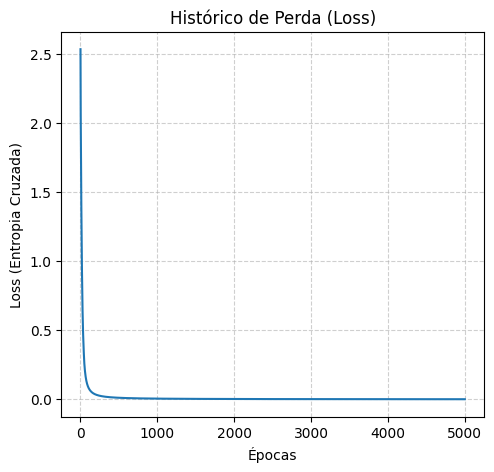

In [71]:
# A. Histórico de Perda
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(modelo.loss_history)
plt.title("Histórico de Perda (Loss)")
plt.xlabel("Épocas")
plt.ylabel("Loss (Entropia Cruzada)")
plt.grid(True, linestyle='--', alpha=0.6)

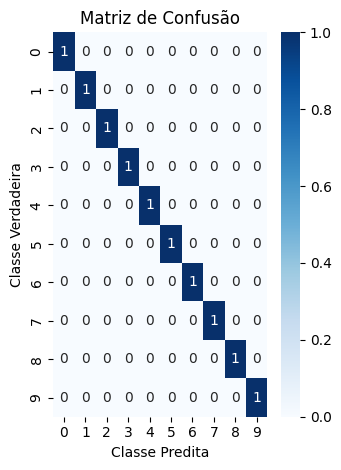

In [72]:
# B. Matriz de Confusão
y_true = y.ravel().astype(int)
cm = confusion_matrix(y_true, result)

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.tight_layout()
plt.show()

In [73]:
print("\nPredições finais:", result)
print("Saídas reais:", y_true)


Predições finais: [0 1 2 3 4 5 6 7 8 9]
Saídas reais: [0 1 2 3 4 5 6 7 8 9]


### ----------------------------------------------
### Teste de ruido
### ---------------------------------------------

In [78]:
# 1. Definição dos dados (10 amostras)
x_ruido = np.array([
    # Digito 0: [1, 1, 1, 1, 1, 1, 0] -> g (0->1)
    [1, 1, 1, 1, 1, 1, 1],
    # Digito 1: [0, 1, 1, 0, 0, 0, 0] -> b (1->0)
    [0, 0, 1, 0, 0, 0, 0],
    # Digito 2: [1, 1, 0, 1, 1, 0, 1] -> c (0->1)
    [1, 1, 1, 1, 1, 0, 1],
    # Digito 3: [1, 1, 1, 1, 0, 0, 1] -> g (1->0)
    [1, 1, 1, 1, 0, 0, 0],
    # Digito 4: [0, 1, 1, 0, 0, 1, 1] -> a (0->1)
    [1, 1, 1, 0, 0, 1, 1],
    # Digito 5: [1, 0, 1, 1, 0, 1, 1] -> b (0->1)
    [1, 1, 0, 1, 0, 1, 1],
    # Digito 6: [1, 0, 1, 1, 1, 1, 1] -> c(1->0) e (1->0)
    [1, 0, 1, 1, 0, 1, 1],
    # Digito 7: [1, 1, 1, 0, 0, 0, 0] -> a (1->0)
    [0, 1, 1, 0, 0, 0, 0],
    # Digito 8: [1, 1, 1, 1, 1, 1, 1] -> g (1->0)
    [1, 1, 1, 0, 0, 1, 0],
    # Digito 9: [1, 1, 1, 1, 0, 1, 1] -> e (0->1)
    [1, 1, 1, 1, 1, 1, 1]
], dtype=np.float32)

y_labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=np.float32)
y = y_labels.reshape(-1, 1) 

print(f"Novo X shape: {x.shape}") # Deve ser (10, 7)
print(f"Novo Y shape: {y.shape}") # Deve ser (10, 1)

modelo = RnModel(
    x_ruido, y_labels,
    hidden_neurons=hidden_neurons,
    output_neurons=output_neurons,
    random_seed=random_seed,
    activation="tanh"
)
result = modelo.fit(learning_rate=learning_rate, epochs=epochs)


Novo X shape: (10, 7)
Novo Y shape: (10, 1)
Epoch: [500 / 5000] Accuracy: 0.900 Loss: 0.1468 Correct: 9 Total: 10
Epoch: [1000 / 5000] Accuracy: 0.900 Loss: 0.1425 Correct: 9 Total: 10
Epoch: [1500 / 5000] Accuracy: 0.900 Loss: 0.1411 Correct: 9 Total: 10
Epoch: [2000 / 5000] Accuracy: 0.900 Loss: 0.1405 Correct: 9 Total: 10
Epoch: [2500 / 5000] Accuracy: 0.900 Loss: 0.1401 Correct: 9 Total: 10
Epoch: [3000 / 5000] Accuracy: 0.900 Loss: 0.1398 Correct: 9 Total: 10
Epoch: [3500 / 5000] Accuracy: 0.900 Loss: 0.1397 Correct: 9 Total: 10
Epoch: [4000 / 5000] Accuracy: 0.900 Loss: 0.1395 Correct: 9 Total: 10
Epoch: [4500 / 5000] Accuracy: 0.900 Loss: 0.1394 Correct: 9 Total: 10
Epoch: [5000 / 5000] Accuracy: 0.900 Loss: 0.1393 Correct: 9 Total: 10


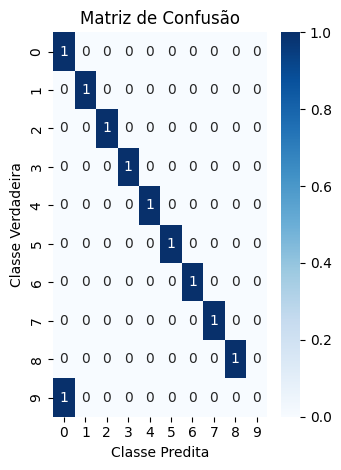

In [79]:
# B. Matriz de Confusão
y_true = y.ravel().astype(int)
cm = confusion_matrix(y_true, result)

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.tight_layout()
plt.show()